<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/imgimg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
import glob

from google.colab.patches import cv2_imshow

In [253]:
img = cv2.imread('00000013.png',cv2.IMREAD_COLOR)
mask = cv2.imread('00000013_mask.png',cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)

In [151]:
h,w = dst.shape[:2]

In [254]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()


def print_image_info(image):
    print('이미지 사이즈 : {}'.format(image.shape))
    print('이미지 dtype : {}'.format(image.dtype))
    print('이미지 Height : {}'.format(image.shape[0]))
    print('이미지 Width : {}'.format(image.shape[1]))
    print('이미지 전체 픽셀 개수 : {}'.format(image.size))

이미지 사이즈 : (2572, 1602, 3)
이미지 dtype : uint8
이미지 Height : 2572
이미지 Width : 1602
이미지 전체 픽셀 개수 : 12361032


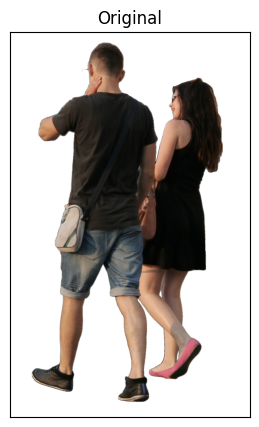

In [255]:
cv2_image = img
print_image_info(cv2_image)
img_show(["Original"], [cv2_image])

이미지 사이즈 : (150, 93, 3)
이미지 dtype : uint8
이미지 Height : 150
이미지 Width : 93
이미지 전체 픽셀 개수 : 41850


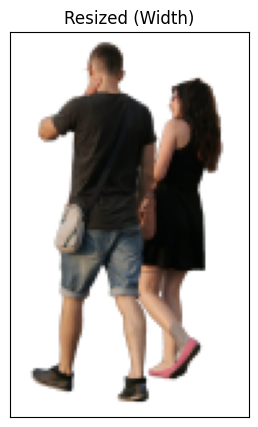

In [262]:
width = 150

aspect_ratio = float(width) / cv2_image.shape[0]
dsize = (int(cv2_image.shape[1] * aspect_ratio),width, )

resized = cv2.resize(cv2_image, dsize, interpolation=cv2.INTER_AREA)
print_image_info(resized)
img_show("Resized (Width)", resized)

이미지 사이즈 : (2572, 1602)
이미지 dtype : uint8
이미지 Height : 2572
이미지 Width : 1602
이미지 전체 픽셀 개수 : 4120344


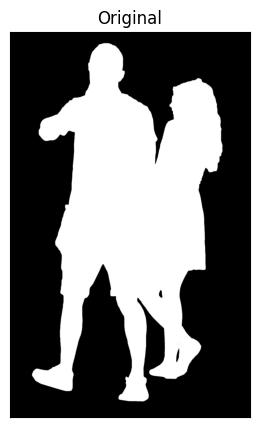

In [155]:
cv2_image_mask = mask
print_image_info(cv2_image_mask)
img_show(["Original"], [cv2_image_mask])

이미지 사이즈 : (44, 28)
이미지 dtype : uint8
이미지 Height : 44
이미지 Width : 28
이미지 전체 픽셀 개수 : 1232


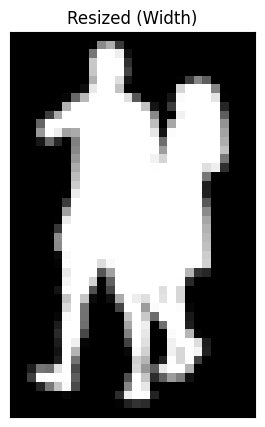

In [156]:
width = w//4

aspect_ratio = float(width) / cv2_image_mask.shape[1]
dsize = (width, int(cv2_image_mask.shape[0] * aspect_ratio))

resized_mask = cv2.resize(cv2_image_mask, dsize, interpolation=cv2.INTER_AREA)
print_image_info(resized_mask)
img_show("Resized (Width)", resized_mask)

In [144]:
dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)

In [157]:
h1,w1 = resized.shape[:2]

In [163]:
crop = dst[h-h1:h,0:w1] #좌측하단

In [118]:
crop = dst[h-h1:h,(w-w1)//2:(w+w1)//2] #가운데하단
crop = dst[h-h1:h,w-w1:w] #우측하단

In [170]:
imgB = np.zeros((h,w),np.uint8)

In [171]:
crop = imgB[h-h1:h,0:w1] #좌측하단

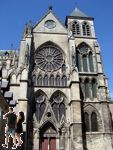

In [164]:
cv2.copyTo(resized,resized_mask,crop).copy()
cv2_imshow(dst)

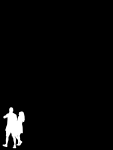

In [173]:
cv2.copyTo(resized_mask,resized_mask,crop).copy()
cv2_imshow(imgB)

In [176]:
cv2.imwrite("/content/save/1.png",dst)
cv2.imwrite("/content/save2/1_mask.png",imgB)

True

In [195]:
import shutil
shutil.rmtree('/content/people_re00000251.png')

In [230]:
shutil.rmtree('/content/people_re')

In [231]:
shutil.rmtree('/content/people_mask_re')

In [246]:
dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)

In [265]:
from PIL import Image
import os
dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)
raw_path = '/content/people/' # 원본 이미지 경로
raw_path_mask = '/content/people_mask/'

token_list = os.listdir(raw_path) # 원본 이미지 경로 내 폴더들 list
token_list_mask = os.listdir(raw_path_mask)

data_path = '/content/people_re/'  # 저장할 이미지 경로
data_mask_path = '/content/people_mask_re/'

  # resize 시작 --------------------
for token in token_list:
  #원본 이미지 경로와 저장할 경로 이미지 지정
  image_path = raw_path
  save_path = data_path

for token in token_list_mask:
  image_mask_path = raw_path_mask
  save_mask_path = data_mask_path

  # 저장할 경로 없으면 생성

if not os.path.exists(save_path):
      os.mkdir(save_path)
if not os.path.exists(save_mask_path):
      os.mkdir(save_mask_path)

  #원본 이미지 경로의 모든 이미지 list 지정

data_list = os.listdir(image_path)
print(len(data_list))

data_mask_list = os.listdir(image_mask_path)
print(len(data_mask_list))

dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)



  # 모든 이미지 resize 후 저장하기
for name in token_list:
  dst = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)
      # 이미지 열기
  img = cv2.imread(image_path + name,cv2.IMREAD_COLOR)

  mask = cv2.imread(image_mask_path + name.strip(".png")+"_mask.png",cv2.IMREAD_GRAYSCALE)

  height = w//2
  cv2_image = img
  aspect_ratio = float(height) / cv2_image.shape[0]
  dsize = (int(cv2_image.shape[1] * aspect_ratio),height)
  resized = cv2.resize(cv2_image, dsize, interpolation=cv2.INTER_AREA)

  cv2_image_mask = mask
  aspect_ratio_mask = float(height) / cv2_image_mask.shape[0]
  dsize_mask = (int(cv2_image_mask.shape[1] * aspect_ratio_mask),height)
  resized_mask = cv2.resize(cv2_image_mask, dsize_mask, interpolation=cv2.INTER_AREA)
  h,w = dst.shape[:2]
  h1,w1 = resized.shape[:2]


  crop = dst[h-h1:h,0:w1] #좌측하단
  #crop = dst[h-h1:h,(w-w1)//2:(w+w1)//2] #가운데하단
  #crop = dst[h-h1:h,w-w1:w] #우측하단

  cv2.copyTo(resized,resized_mask,crop).copy()
  cv2.imwrite(save_path + name,dst)

  #st = cv2.imread('real_scale.png',cv2.IMREAD_COLOR)
  imgB = np.zeros((h,w),np.uint8)
  crop = imgB[h-h1:h,0:w1] #좌측하단
  #crop = imgB[h-h1:h,(w-w1)//2:(w+w1)//2] #가운데하단
  #crop = imgB[h-h1:h,w-w1:w] #우측하단

  cv2.copyTo(resized_mask,resized_mask,crop).copy()
  cv2.imwrite(save_mask_path + name.strip(".png")+"_mask.png",imgB)
print('end ::: ' + token)

22
22
end ::: 00000019_mask.png


In [266]:
!zip -r /content/people_single_01.zip /content/people_re

  adding: content/people_re/ (stored 0%)
  adding: content/people_re/00000170.png (deflated 0%)
  adding: content/people_re/00000054.png (deflated 0%)
  adding: content/people_re/00000029.png (deflated 0%)
  adding: content/people_re/00000302.png (deflated 0%)
  adding: content/people_re/00000397.png (deflated 0%)
  adding: content/people_re/00000159.png (deflated 0%)
  adding: content/people_re/00000236.png (deflated 0%)
  adding: content/people_re/00000066.png (deflated 0%)
  adding: content/people_re/00000011.png (deflated 0%)
  adding: content/people_re/00000019.png (deflated 0%)
  adding: content/people_re/00000003.png (deflated 0%)
  adding: content/people_re/00000202.png (deflated 0%)
  adding: content/people_re/00000168.png (deflated 0%)
  adding: content/people_re/00000164.png (deflated 0%)
  adding: content/people_re/00000273.png (deflated 0%)
  adding: content/people_re/00000117.png (deflated 0%)
  adding: content/people_re/00000056.png (deflated 0%)
  adding: content/people

In [267]:
!zip -r /content/people_single_mask_01.zip /content/people_mask_re

  adding: content/people_mask_re/ (stored 0%)
  adding: content/people_mask_re/00000201_mask.png (deflated 12%)
  adding: content/people_mask_re/00000251_mask.png (deflated 12%)
  adding: content/people_mask_re/00000397_mask.png (deflated 12%)
  adding: content/people_mask_re/00000054_mask.png (deflated 15%)
  adding: content/people_mask_re/00000117_mask.png (deflated 14%)
  adding: content/people_mask_re/00000302_mask.png (deflated 11%)
  adding: content/people_mask_re/00000168_mask.png (deflated 11%)
  adding: content/people_mask_re/00000003_mask.png (deflated 12%)
  adding: content/people_mask_re/00000175_mask.png (deflated 11%)
  adding: content/people_mask_re/00000066_mask.png (deflated 15%)
  adding: content/people_mask_re/00000159_mask.png (deflated 12%)
  adding: content/people_mask_re/00000169_mask.png (deflated 12%)
  adding: content/people_mask_re/00000202_mask.png (deflated 12%)
  adding: content/people_mask_re/00000029_mask.png (deflated 13%)
  adding: content/people_mask_